In [ ]:
!nvidia-smi

In [ ]:
!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
#Model Training
!yolo task=detect mode=train model=yolov8m.pt data=../content/drive/MyDrive/CellType/data.yaml epochs=20 imgsz=800 plots=True

100% 49.7M/49.7M [00:00<00:00, 305MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=../content/drive/MyDrive/CellType/data.yaml, epochs=20, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opt

In [ ]:
!ls /content/runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1695625087.0a4c3b153e6a.3764.0  train_batch2.jpg
F1_curve.png					    train_batch70.jpg
P_curve.png					    train_batch71.jpg
PR_curve.png					    train_batch72.jpg
R_curve.png					    val_batch0_labels.jpg
results.csv					    val_batch0_pred.jpg
results.png					    weights


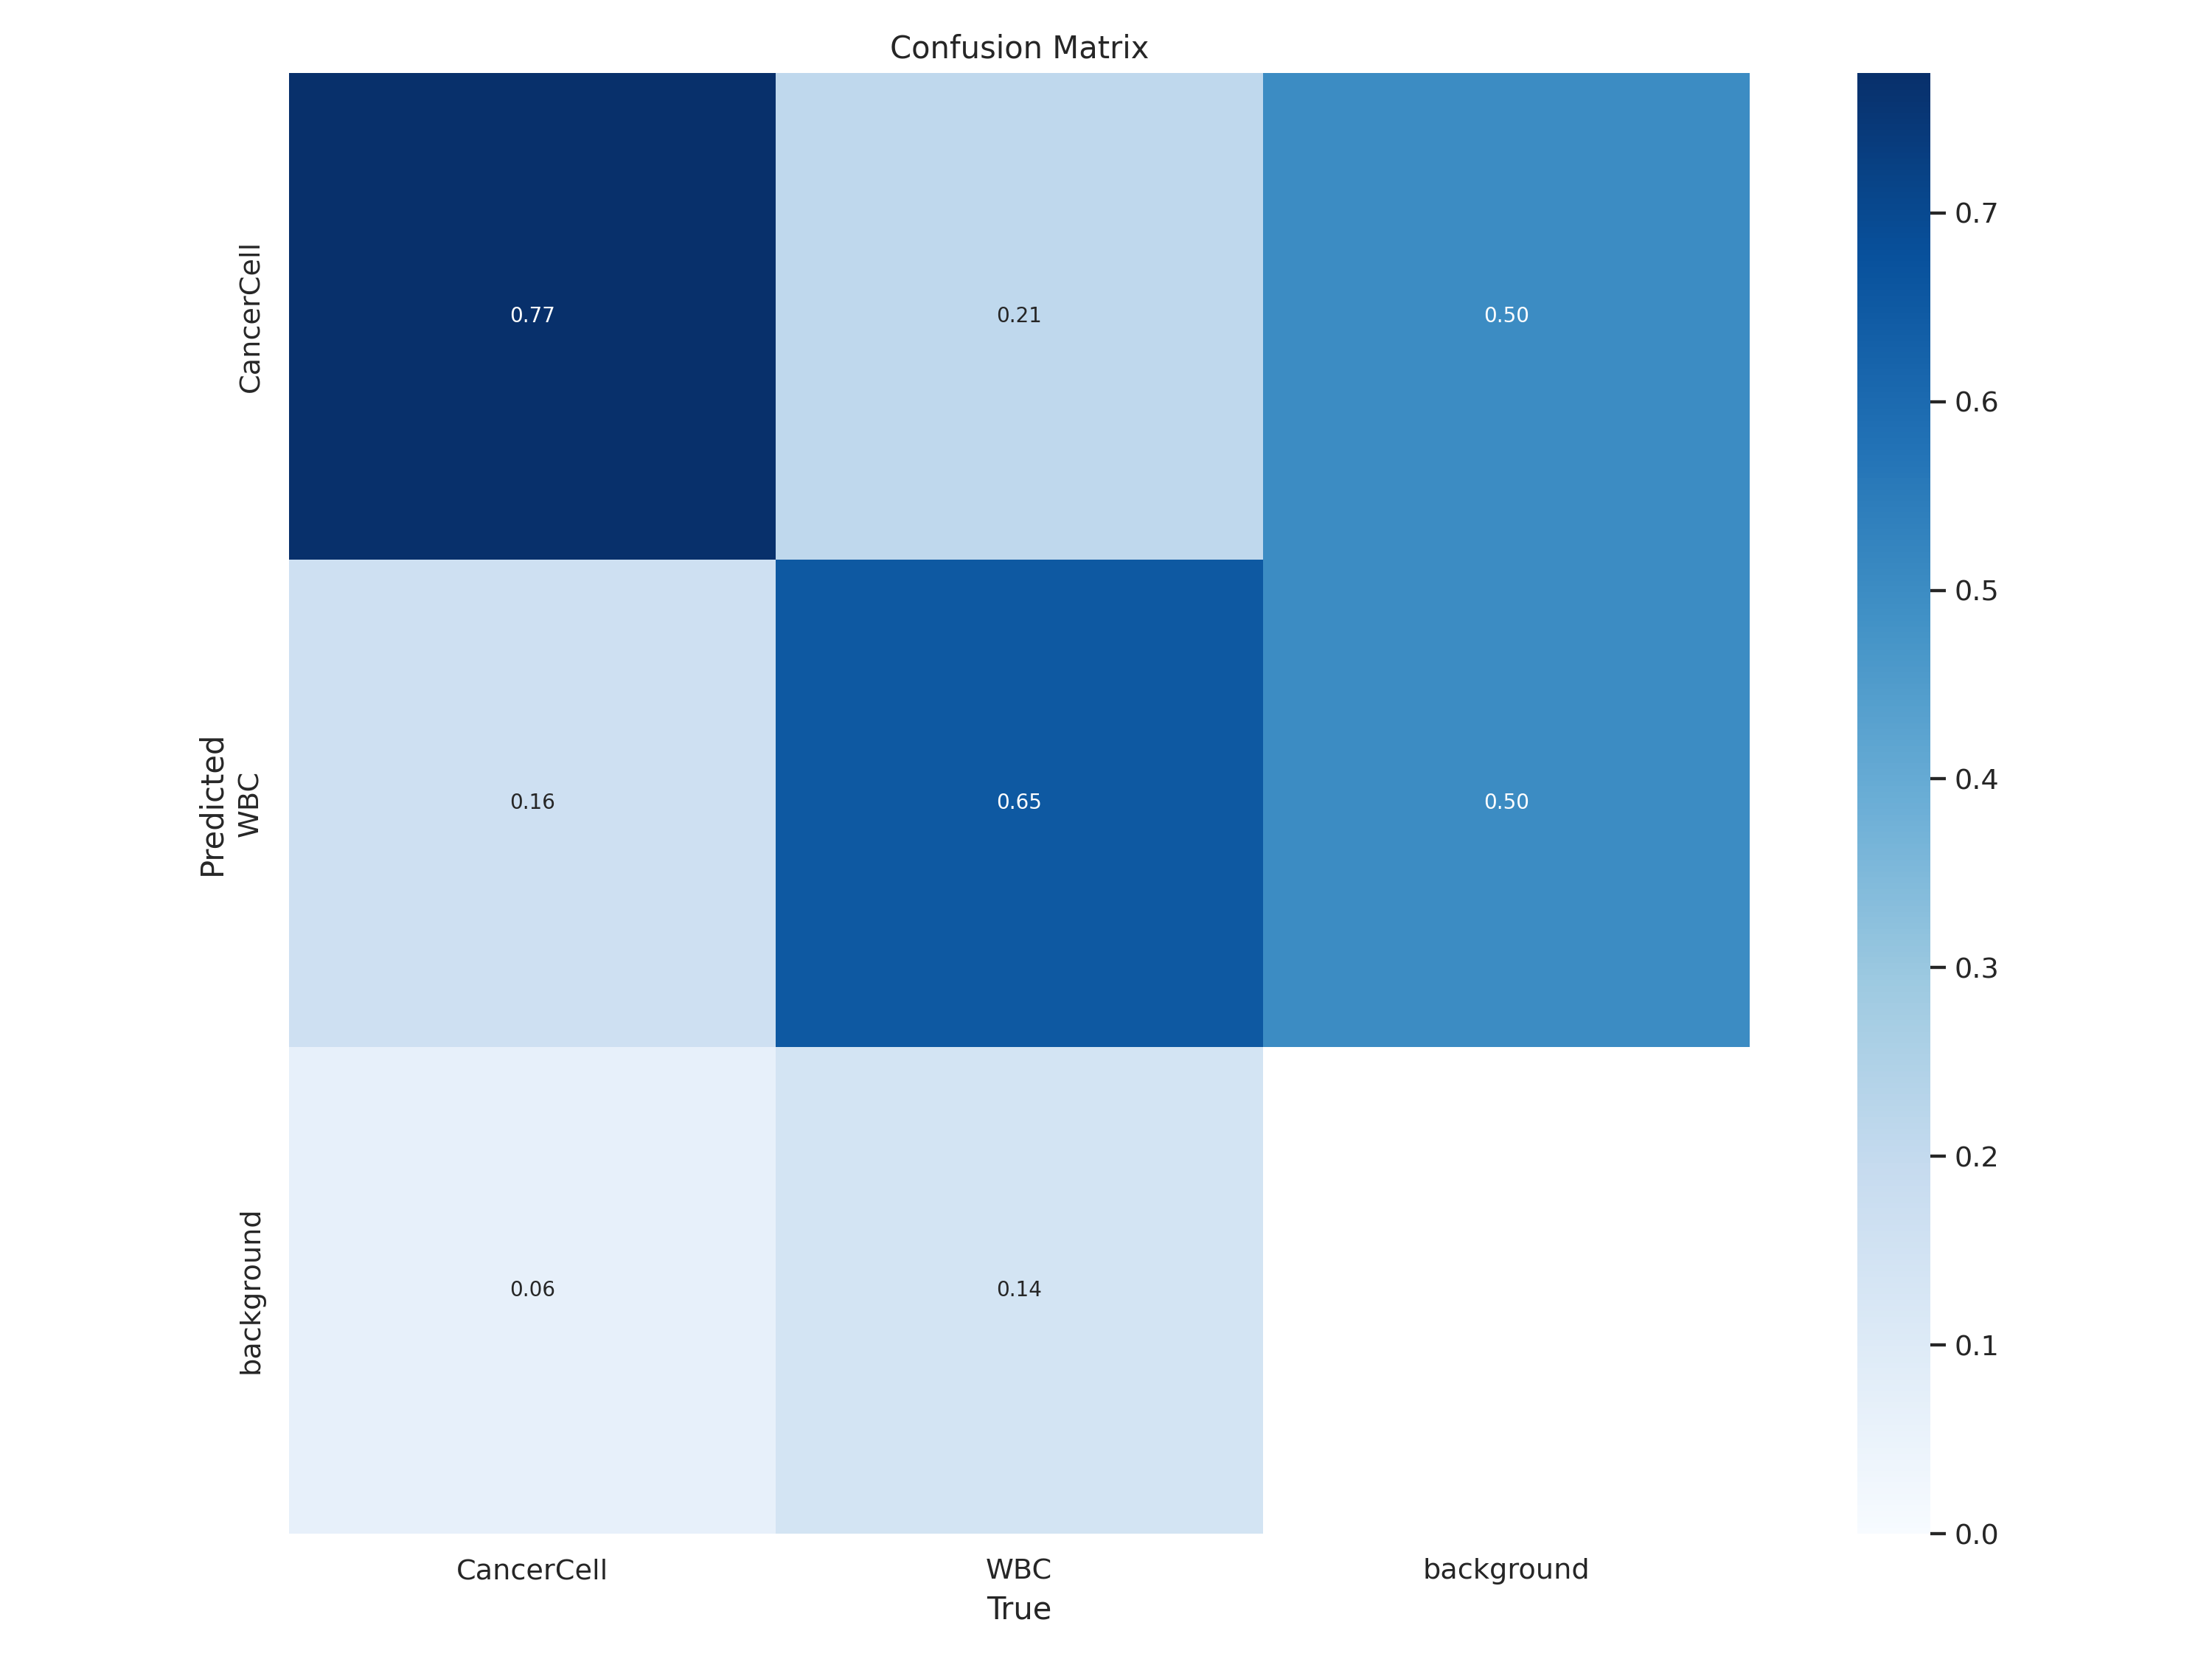

In [ ]:
image_path = "/content/runs/detect/train/confusion_matrix.png"
Image(filename=image_path, width=700)


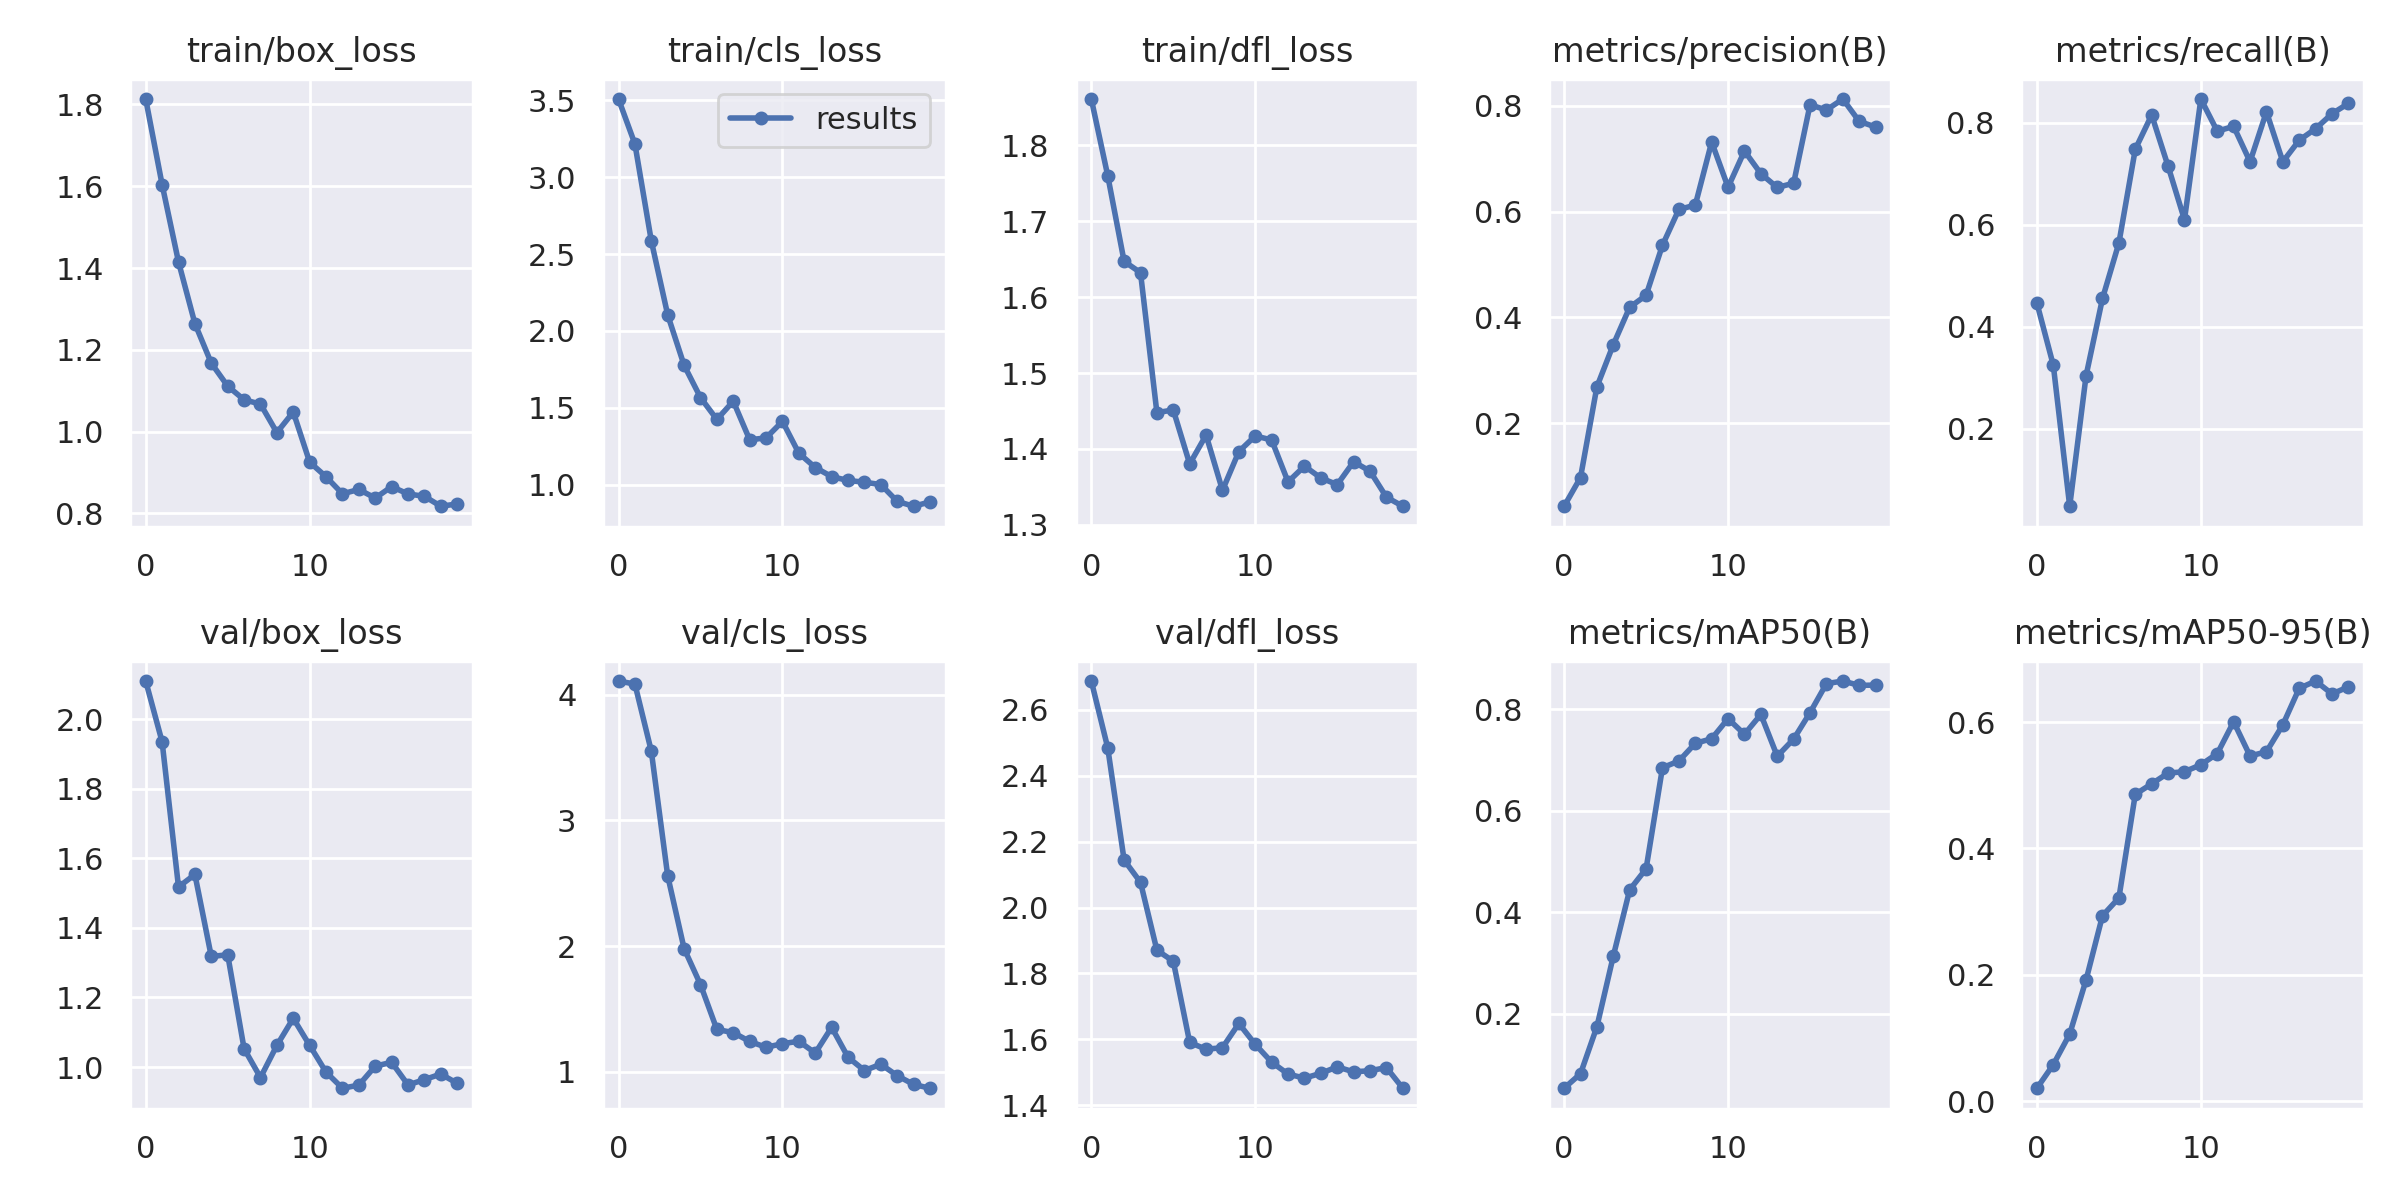

In [ ]:
image_path = "/content/runs/detect/train/results.png"
Image(filename=image_path, width=700)

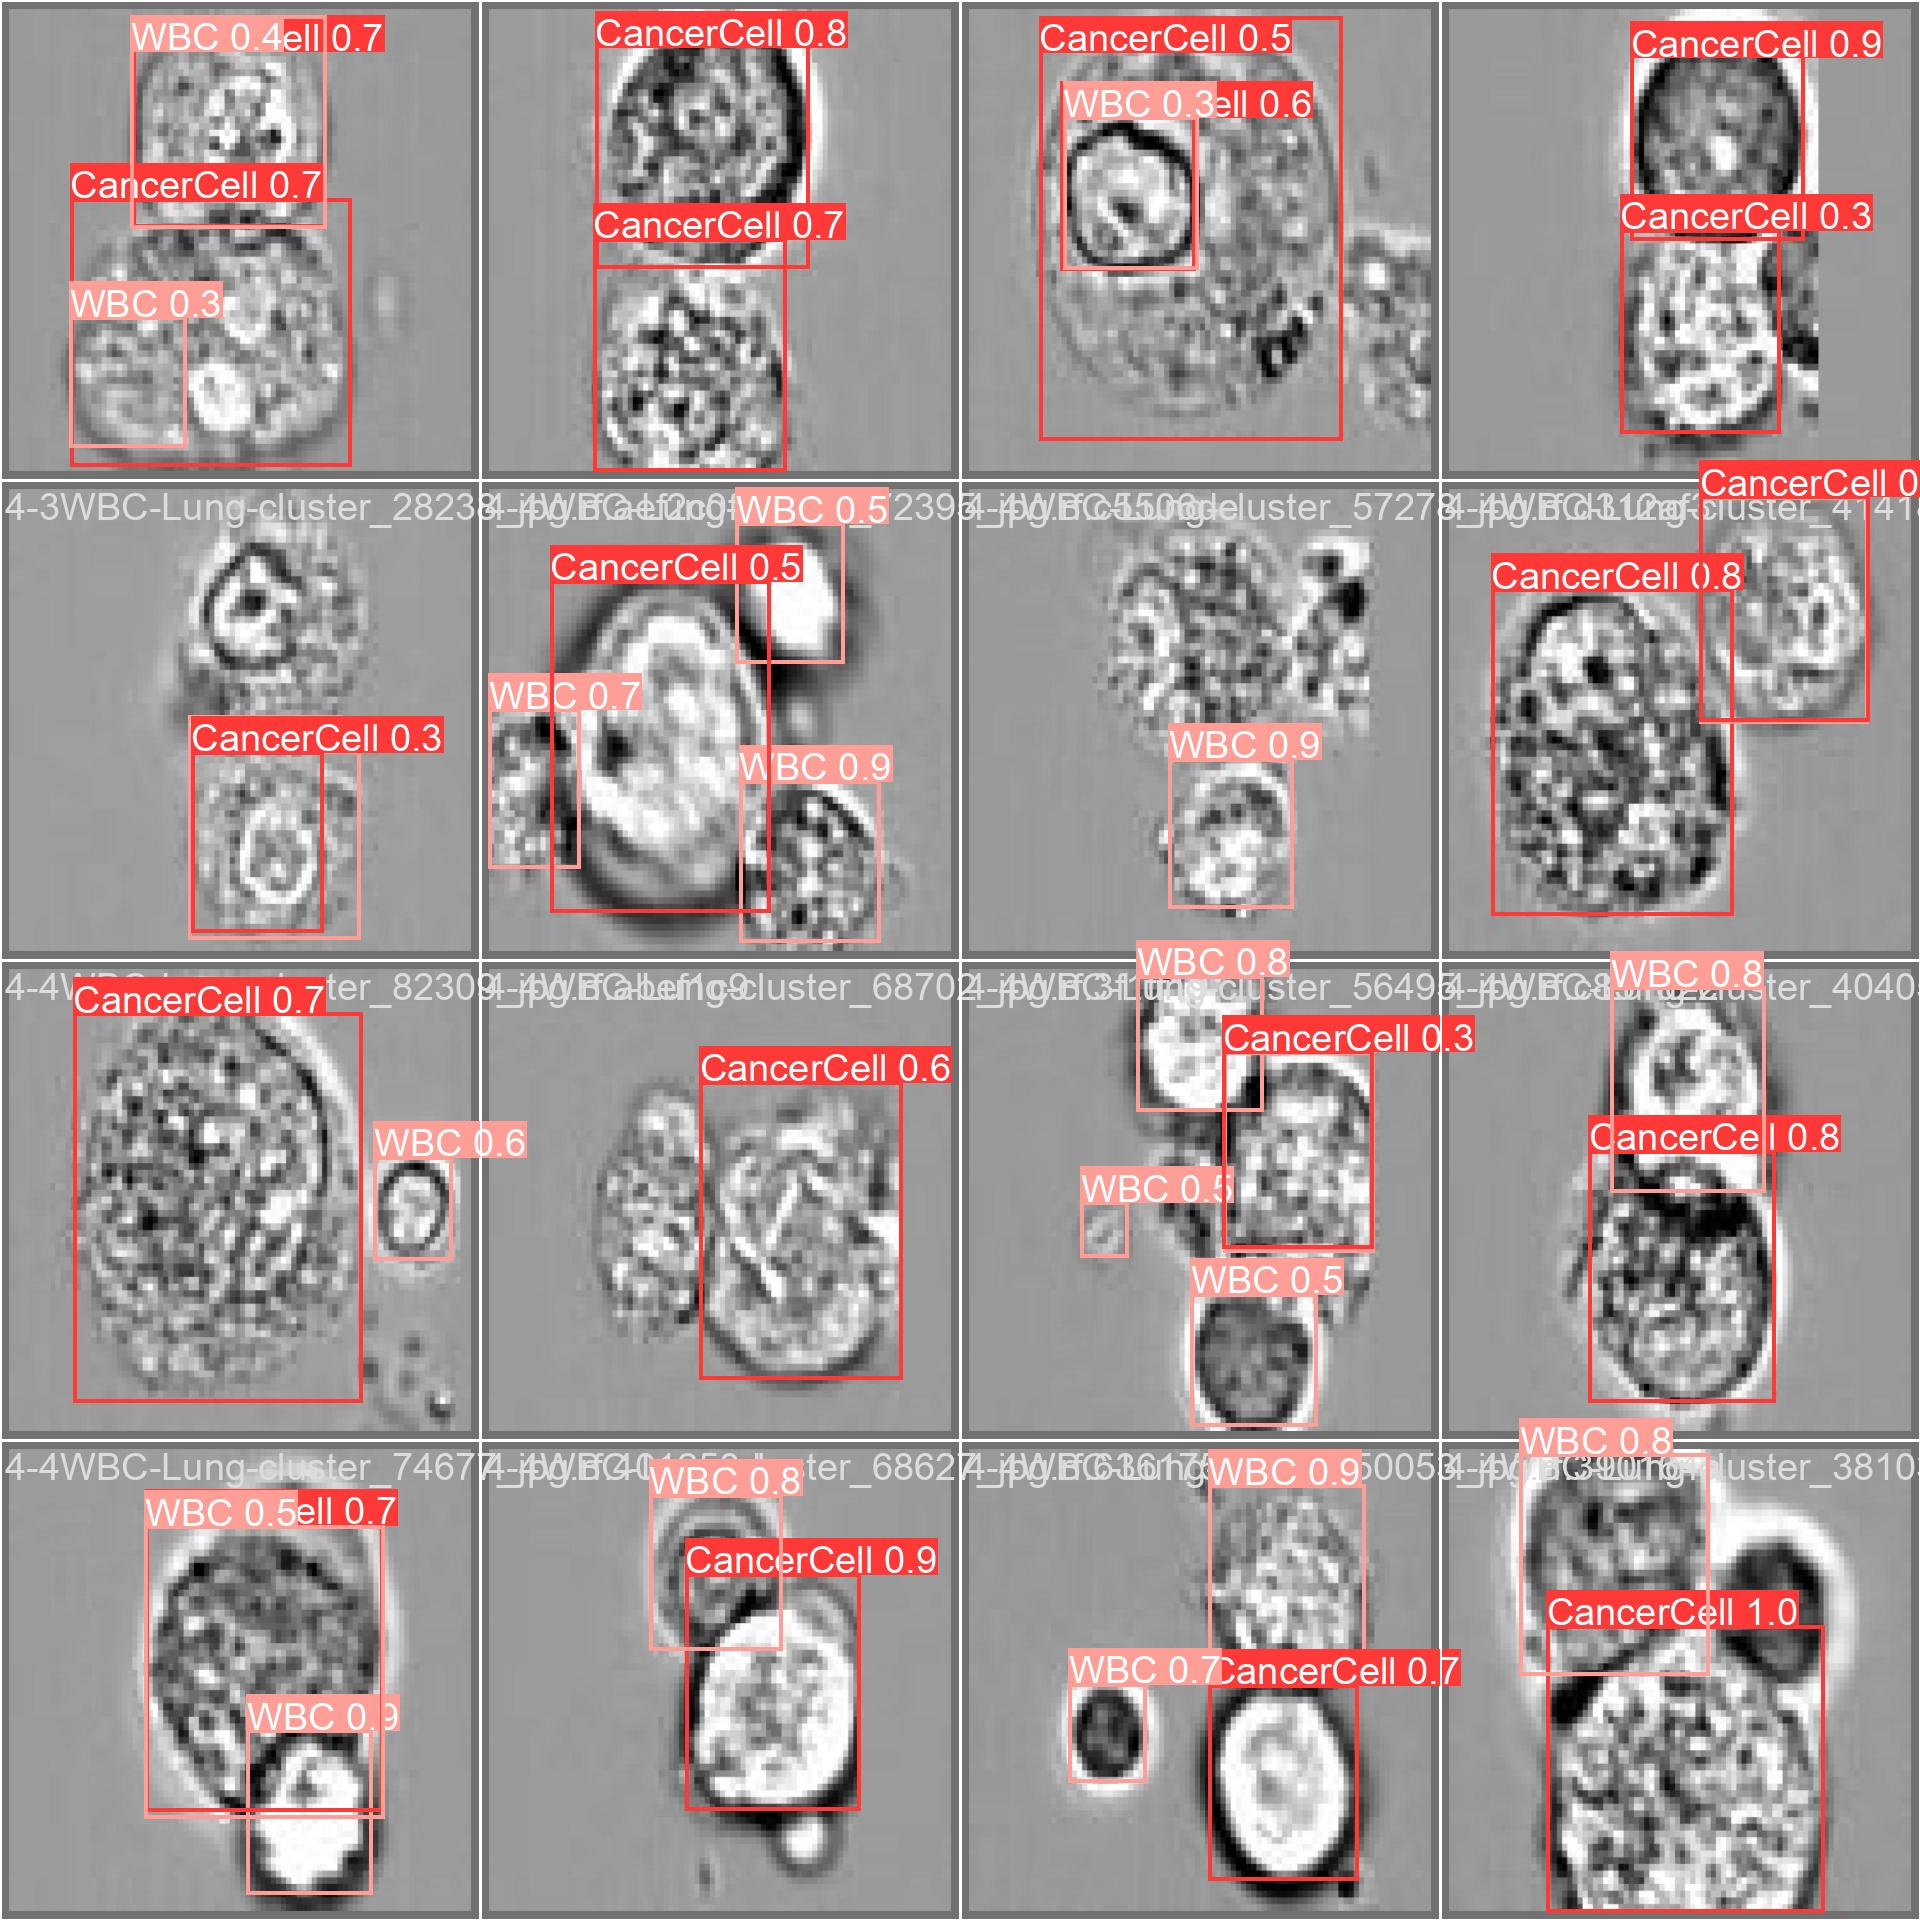

In [ ]:
image_path = "/content/runs/detect/train/val_batch0_pred.jpg"
Image(filename=image_path, width=700)

In [ ]:
#Validate the model
!yolo task=detect mode=val model='/content/runs/detect/train/weights/best.pt' data='/content/drive/MyDrive/CellType/data.yaml'

2023-09-25 07:12:17.537783: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 07:12:18.413425: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/CellType/valid/labels.cache... 32 images, 0 backgrounds, 0 corrupt: 100% 32/32 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.41s/it]
                   all         32         74      0.813      0.789      0.856      0.665
            CancerCell         32         

In [ ]:
#Inference
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt'conf=0.25 source='/content/drive/MyDrive/CellType'/test/images save=True


2023-09-25 07:12:56.542443: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 07:12:57.433634: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
image 1/16 /content/drive/MyDrive/CellType/test/images/1-3WBC-Lung-cluster_10613_jpg.rf.c74db50a0d544a4eb415ee40978c60ca.jpg: 800x800 1 CancerCell, 1 WBC, 58.3ms
image 2/16 /content/drive/MyDrive/CellType/test/images/1-3WBC-Lung-cluster_20028_jpg.rf.06636086155613510326322abcfd4bcd.jpg: 800x800 1 CancerCell, 1 WBC, 58.3ms
image 3/16 /content/drive/MyDrive/CellType/test/images/1-3WBC-Lu

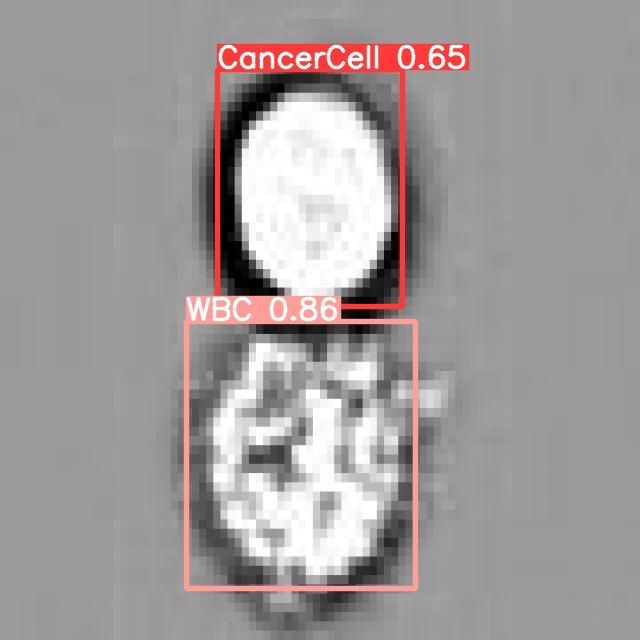

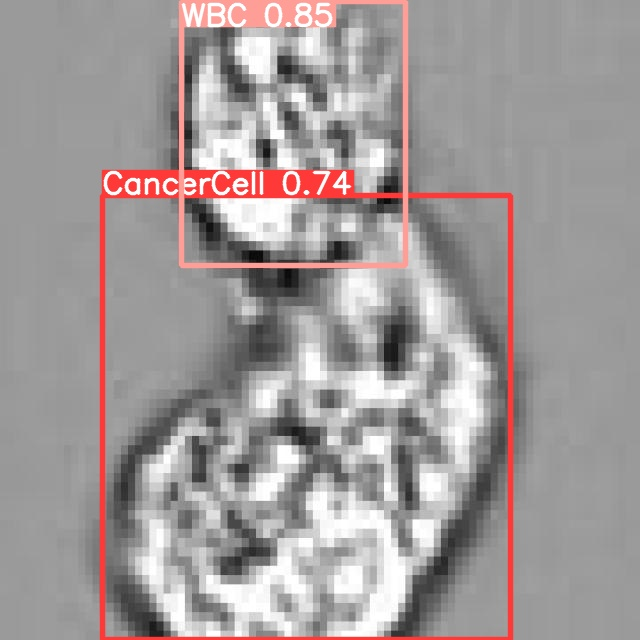

In [ ]:
#Visualize the predicted result
import glob
from IPython.display import Image, display
for image_path in glob.glob('/content/runs/detect/predict/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))
      print("\n")